<a href="https://colab.research.google.com/github/tj-mas04/Apartment_Rent_Data/blob/main/apartment_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Step 1: Install & Import Necessary Libraries
!pip install kagglehub pandas numpy seaborn matplotlib scikit-learn

import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

In [137]:
# Step 3: Upload & Load Dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding="ISO-8859-1", sep=";")
print(df.info())

Saving apartments_for_rent_classified_10K.csv to apartments_for_rent_classified_10K.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  citynam

In [140]:
# Count missing values before handling
print("Missing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
id                  0
category            0
title               0
body                0
amenities        3237
bathrooms          30
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     3871
price               0
price_display       0
price_type          0
square_feet         0
address          3174
cityname           72
state              72
latitude           10
longitude          10
source              0
time                0
dtype: int64


In [141]:
# Step 4: Handle Missing Values
def handle_missing_values(df):
    df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
    df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
    df['latitude'].fillna(df['latitude'].median(), inplace=True)
    df['longitude'].fillna(df['longitude'].median(), inplace=True)
    df['amenities'].fillna("Unknown", inplace=True)
    df['pets_allowed'].fillna("Unknown", inplace=True)
    df['address'].fillna("Unknown", inplace=True)
    df['cityname'].fillna(df['cityname'].mode()[0], inplace=True)
    df['state'].fillna(df['state'].mode()[0], inplace=True)
    return df

df = handle_missing_values(df)

<ipython-input-141-50b753d350fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
<ipython-input-141-50b753d350fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [142]:
# Count missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64


In [143]:
# Display unique values before standardization
print("Unique Values Before Standardization:\n")
print("fee:", df['fee'].unique())
print("has_photo:", df['has_photo'].unique())
print("pets_allowed:", df['pets_allowed'].unique())


Unique Values Before Standardization:

fee: ['No']
has_photo: ['Thumbnail' 'Yes' 'No']
pets_allowed: ['Unknown' 'Cats,Dogs' 'Cats' 'Dogs']


In [144]:
# Step 5: Standardize Categorical Values
def standardize_categorical_values(df):
    df['fee'] = df['fee'].map({'Yes': 1, 'No': 0})
    df['has_photo'] = df['has_photo'].map({'Thumbnail': 1, 'None': 0})
    df['pets_allowed'] = df['pets_allowed'].map({'Yes': 1, 'No': 0, 'Unknown': -1})
    return df

df = standardize_categorical_values(df)

In [145]:
# Display unique values after standardization
print("\nUnique Values After Standardization:\n")
print("fee:", df['fee'].unique())
print("has_photo:", df['has_photo'].unique())
print("pets_allowed:", df['pets_allowed'].unique())



Unique Values After Standardization:

fee: [0]
has_photo: [ 1. nan]
pets_allowed: [-1. nan]


In [146]:
# Display some values before extraction
print("Before Extracting Numerical Price:\n")
print(df[['price_display']].head(10))  # Show first 10 values


Before Extracting Numerical Price:

  price_display
0          $790
1          $425
2        $1,390
3          $925
4          $880
5        $2,475
6        $1,800
7          $840
8        $1,495
9          $890


In [147]:
# Step 6: Extract Numerical Price
def extract_price(df):
    df['price_display'] = df['price_display'].str.extract(r'([\d,]+)')[0]
    df['price_display'] = df['price_display'].str.replace(',', '').astype(float)
    return df

df = extract_price(df)

In [148]:
# Display some values after extraction
print("\nAfter Extracting Numerical Price:\n")
print(df[['price_display']].head(10))  # Show first 10 values



After Extracting Numerical Price:

   price_display
0          790.0
1          425.0
2         1390.0
3          925.0
4          880.0
5         2475.0
6         1800.0
7          840.0
8         1495.0
9          890.0


In [149]:
# Step 7: Remove Duplicates & Standardize Column Names
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [150]:
# Step 8: Convert UNIX Timestamp to Date
def convert_timestamp(df):
    df['date_listed'] = df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
    df.drop(columns=['time'], inplace=True)
    return df

df = convert_timestamp(df)

In [151]:
# Display the first few rows after conversion
print("\nAfter Converting UNIX Timestamp:")
print(df[['date_listed']].head())



After Converting UNIX Timestamp:
  date_listed
0  2019-12-26
1  2019-12-22
2  2019-12-26
3  2019-12-18
4  2019-12-26


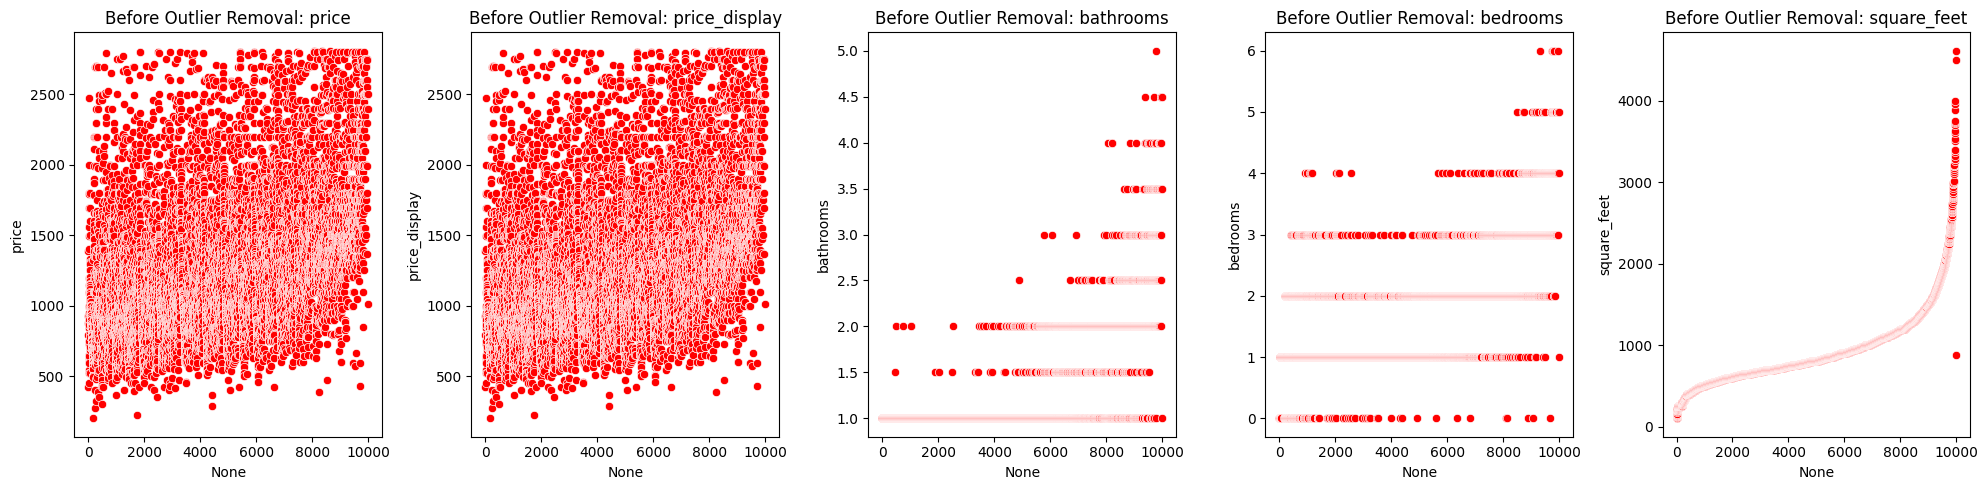

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy original dataset before removing outliers
df_before_outliers = df.copy()

# Scatter plot before outlier removal
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 5))

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df_before_outliers.index, y=df_before_outliers[col], ax=axes[i], color="red")
    axes[i].set_title(f"Before Outlier Removal: {col}")

plt.tight_layout()
plt.show()


In [153]:
# Step 10: Outlier Detection & Removal
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_cols = ['price', 'price_display', 'bathrooms', 'bedrooms', 'square_feet']
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

print("Dataset shape after outlier removal:", df.shape)

Dataset shape after outlier removal: (8466, 22)


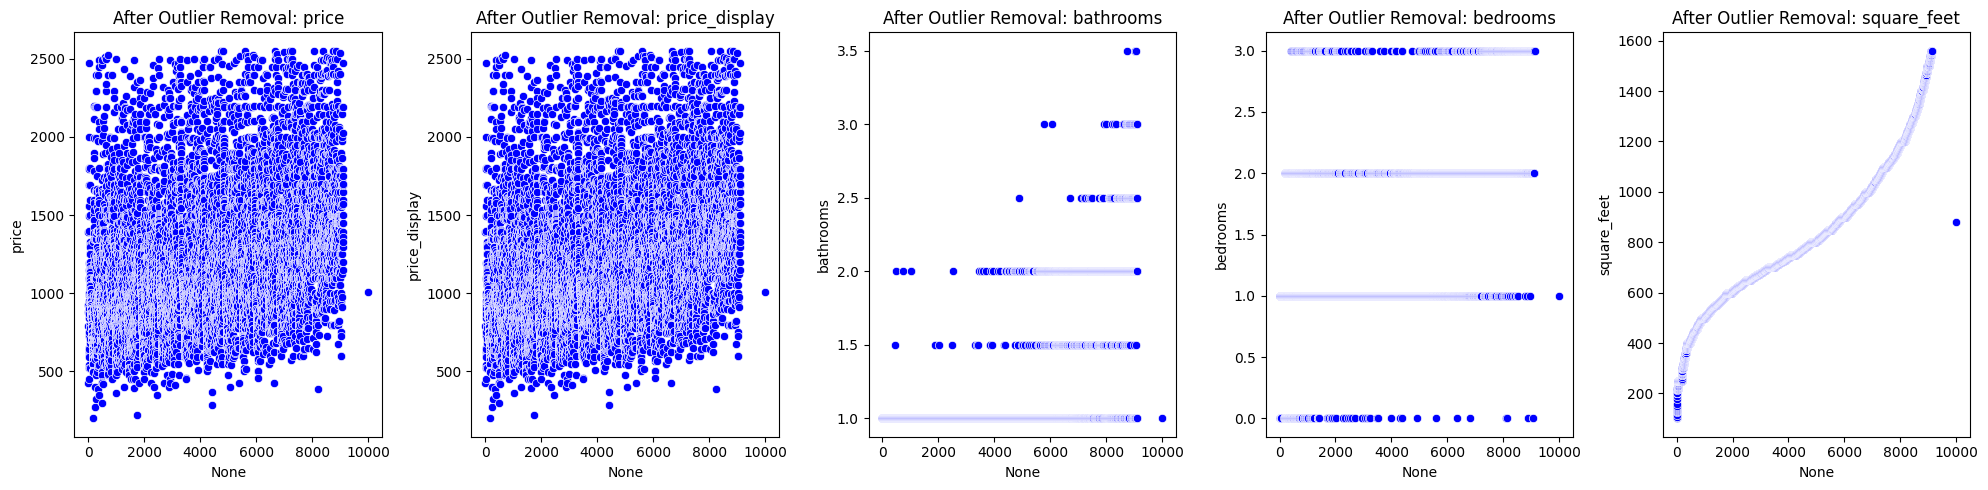

In [154]:
# Scatter plot after outlier removal
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 5))

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df.index, y=df[col], ax=axes[i], color="blue")
    axes[i].set_title(f"After Outlier Removal: {col}")

plt.tight_layout()
plt.show()


In [155]:
print("Columns before dropping irrelevant ones:")
print(df.columns.tolist())  # List all column names before

Columns before dropping irrelevant ones:
['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price', 'price_display', 'price_type', 'square_feet', 'address', 'cityname', 'state', 'latitude', 'longitude', 'source', 'date_listed']


In [156]:
# Step 11: Drop Irrelevant Columns
columns_to_drop = ['id', 'category', 'source', 'title', 'body']
df.drop(columns=columns_to_drop, inplace=True)

In [157]:
print("\nColumns after dropping irrelevant ones:")
print(df.columns.tolist())  # List all column names after



Columns after dropping irrelevant ones:
['amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price', 'price_display', 'price_type', 'square_feet', 'address', 'cityname', 'state', 'latitude', 'longitude', 'date_listed']


In [158]:
print("Columns before One-Hot Encoding:")
print(df.columns.tolist())  # Display column names before encoding

print("\nUnique values in categorical columns:")
for col in ['currency', 'price_type', 'cityname', 'state']:
    print(f"{col}: {df[col].unique()[:5]}")  # Show first 5 unique values


Columns before One-Hot Encoding:
['amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price', 'price_display', 'price_type', 'square_feet', 'address', 'cityname', 'state', 'latitude', 'longitude', 'date_listed']

Unique values in categorical columns:
currency: ['USD']
price_type: ['Monthly' 'Weekly' 'Monthly|Weekly']
cityname: ['Washington' 'Evansville' 'Arlington' 'Seattle' 'Manhattan']
state: ['DC' 'IN' 'VA' 'WA' 'NY']


In [159]:
# Step 12: One-Hot Encoding
df = pd.get_dummies(df, columns=['currency', 'price_type', 'cityname', 'state'], drop_first=True)

In [163]:
print("\nColumns after One-Hot Encoding:")
print(df.columns.tolist())  # Display column names after encoding

print("\nSample Encoded Data:")
print(df.head())  # Show the first few rows to check the new one-hot encoded columns



Columns after One-Hot Encoding:
['amenities', 'bathrooms', 'bedrooms', 'fee', 'has_photo', 'pets_allowed', 'price', 'price_display', 'square_feet', 'address', 'latitude', 'longitude', 'date_listed', 'price_type_Monthly|Weekly', 'price_type_Weekly', 'cityname_Abilene', 'cityname_Abingdon', 'cityname_Abington', 'cityname_Absecon', 'cityname_Addison', 'cityname_Adelphi', 'cityname_Agoura Hills', 'cityname_Akron', 'cityname_Albany', 'cityname_Albuquerque', 'cityname_Alexandria', 'cityname_Alhambra', 'cityname_Aliquippa', 'cityname_Aloha', 'cityname_Alpharetta', 'cityname_Alpine', 'cityname_Altamonte Springs', 'cityname_Altoona', 'cityname_Alvin', 'cityname_Amarillo', 'cityname_Amelia', 'cityname_Ames', 'cityname_Amherst', 'cityname_Amsterdam', 'cityname_Anaheim', 'cityname_Anchorage', 'cityname_Anderson', 'cityname_Andover', 'cityname_Angleton', 'cityname_Ankeny', 'cityname_Ann Arbor', 'cityname_Annapolis', 'cityname_Anniston', 'cityname_Anoka', 'cityname_Ansonia', 'cityname_Anthem', 'cit

In [164]:
print("Numerical columns before normalization:")
print(df[numerical_cols].describe())  # Summary statistics before scaling

Numerical columns before normalization:
             price  price_display    bathrooms     bedrooms  square_feet
count  8466.000000    8466.000000  8466.000000  8466.000000  8466.000000
mean   1242.050319    1242.050319     1.244035     1.528467   803.309001
std     444.671317     444.671317     0.441206     0.695580   272.962034
min     200.000000     200.000000     1.000000     0.000000   101.000000
25%     900.000000     900.000000     1.000000     1.000000   623.000000
50%    1175.000000    1175.000000     1.000000     1.000000   760.000000
75%    1500.000000    1500.000000     1.000000     2.000000   969.000000
max    2552.000000    2552.000000     3.500000     3.000000  1560.000000


In [166]:
from sklearn.preprocessing import MinMaxScaler

df_before = df.copy()  # Save a copy before transformation

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [167]:
print("\nNumerical columns after normalization:")
print(df[numerical_cols].describe())  # Summary statistics after scaling

print("\nSample Normalized Data:")
print(df.head())  # Show the first few rows



Numerical columns after normalization:
             price  price_display    bathrooms     bedrooms  square_feet
count  8466.000000    8466.000000  8466.000000  8466.000000  8466.000000
mean      0.443049       0.443049     0.097614     0.509489     0.481363
std       0.189061       0.189061     0.176483     0.231860     0.187088
min       0.000000       0.000000     0.000000     0.000000     0.000000
25%       0.297619       0.297619     0.000000     0.333333     0.357779
50%       0.414541       0.414541     0.000000     0.333333     0.451679
75%       0.552721       0.552721     0.000000     0.666667     0.594928
max       1.000000       1.000000     1.000000     1.000000     1.000000

Sample Normalized Data:
  amenities  bathrooms  bedrooms  fee  has_photo  pets_allowed     price  \
0   Unknown        0.0  0.000000    0        1.0          -1.0  0.250850   
1   Unknown        0.0  0.333333    0        1.0          -1.0  0.095663   
2   Unknown        0.0  0.000000    0        1.0  